In [1]:
import sys
sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                image                   id  \
1830  ../data/Train/CameraRGB/episode_0003_000154.png  episode_0003_000154   
1450                  ../data/Train/CameraRGB/939.png                  939   
353                   ../data/Train/CameraRGB/599.png                  599   
1643  ../data/Train/CameraRGB/episode_0000_000248.png  episode_0000_000248   
1395  ../data/Train/CameraRGB/episode_0003_000110.png  episode_0003_000110   

                                                label  
1830  ../data/Train/CameraSeg/episode_0003_000154.png  
1450                  ../data/Train/CameraSeg/939.png  
353                   ../data/Train/CameraSeg/599.png  
1643  ../data/Train/CameraSeg/episode_0000_000248.png  
1395  ../data/Train/CameraSeg/episode_0003_000110.png  


In [4]:
from models.fcn8 import model_fcn8

model = model_fcn8(3, image_shape=(224, 224, 3), keep_prob=0.6)
model.summary()

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
__________________________________________________________________________________________________
block2_con

In [6]:
from gen.generators import train_and_lab_gen_func

BATCH_SIZE = 32

train_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(224, 224), batch_size = BATCH_SIZE)
valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(224, 224), batch_size = BATCH_SIZE)
# test_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(480, 480),  batch_size = BATCH_SIZE)

In [7]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model, 
                   train_gen, 
                   valid_gen, 
                   training_size=m, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path='../saved_models/fcn8_lowres', 
                   epochs=100,
                  gpus = 2)

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 im

39/39 [==============================] - 26s 676ms/step - loss: 0.3905 - acc: 0.9751 - val_loss: 0.8978 - val_acc: 0.9434

Epoch 00028: val_loss did not improve
Epoch 29/100
39/39 [==============================] - 27s 693ms/step - loss: 0.3856 - acc: 0.9754 - val_loss: 0.8310 - val_acc: 0.9476

Epoch 00029: val_loss improved from 0.87402 to 0.83100, saving model to ../saved_models/fcn8_lowres/model.hdf5
Epoch 30/100
39/39 [==============================] - 27s 686ms/step - loss: 0.3735 - acc: 0.9762 - val_loss: 0.7946 - val_acc: 0.9499

Epoch 00030: val_loss improved from 0.83100 to 0.79459, saving model to ../saved_models/fcn8_lowres/model.hdf5
Epoch 31/100
39/39 [==============================] - 27s 695ms/step - loss: 0.3777 - acc: 0.9759 - val_loss: 0.8184 - val_acc: 0.9484

Epoch 00031: val_loss did not improve
Epoch 32/100
39/39 [==============================] - 27s 682ms/step - loss: 0.3769 - acc: 0.9760 - val_loss: 0.8981 - val_acc: 0.9434

Epoch 00032: val_loss did not impro

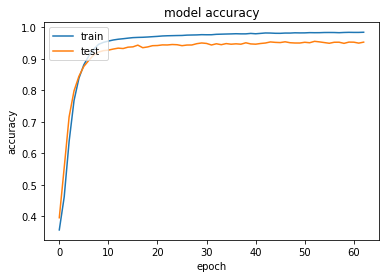

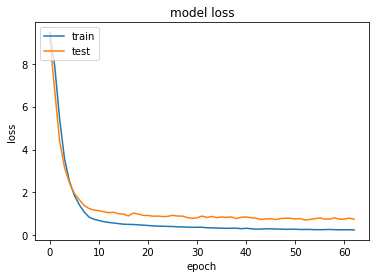

In [8]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
model.save('../saved_models/fcn8_lowres/model_saved.h5')

In [ ]:
#valid_gen = train_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(480, 480), batch_size = BATCH_SIZE * gpus)
#test_gen = train_and_lab_gen_func(test_df, image_size=(600, 800),  target_size=(480, 480),  batch_size = BATCH_SIZE * gpus)